In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [282]:
df = pd.read_csv("SVMdataset.csv")


In [283]:
df.head()


,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [284]:
x=df.iloc[:,:-1].values
y=df.iloc[:,2].values

In [285]:
X_train,X1, y_train,y1 = train_test_split(x,y, train_size=0.6,random_state=0)
X_test,X_valid,y_test,y_valid= train_test_split(X1,y1,train_size=0.5,random_state=0)

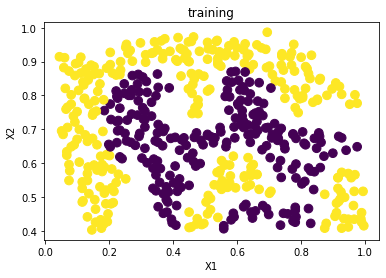

In [286]:
plt.scatter(X_train[:,0],X_train[:,1],s = 75,c=y_train)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('training')
plt.show()

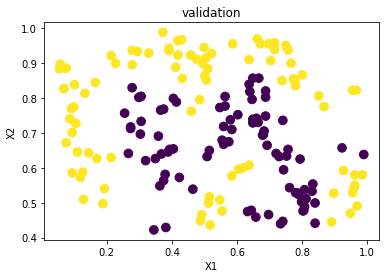

In [287]:
plt.scatter(X_valid[:,0],X_valid[:,1],s=75,c=y_valid)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('validation')
plt.show()

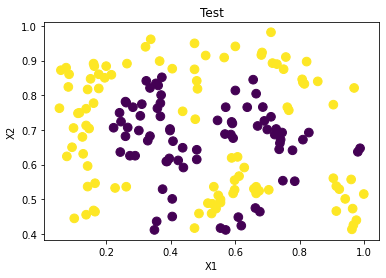

In [288]:
plt.scatter(X_test[:,0],X_test[:,1],s = 75,c=y_test)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Test')
plt.show()

In [289]:
c=np.zeros(20)
l=0
i=1000
while l<20:
    c[l]=i
    i=i/2
    l=l+1

g=np.zeros(20)
l=0
i=1000
while l<20:
    g[l]=i
    i=i/2
    l=l+1

In [290]:
c_better=1000
g_better=1000
clf=SVC(kernel='rbf',C=c_better,gamma=g_better)
clf.fit(X_train,y_train)
y_valid_pred=clf.predict(X_valid)
f1_better=metrics.f1_score(y_valid,y_valid_pred)
for ii in c:
    for iii in g:
        clf = SVC(kernel='rbf',C =ii,gamma=iii)
        clf.fit(X_train, y_train)
        y_valid_pred=clf.predict(X_valid)
        f1=metrics.f1_score(y_valid,y_valid_pred)
        if f1_better<f1:
            f1_better=f1
            c_better=ii
            g_better=iii
            

clf=SVC(kernel='rbf',C =c_better,gamma=g_better)
clf.fit(X_train, y_train)

SVC(C=1000.0, gamma=31.25)

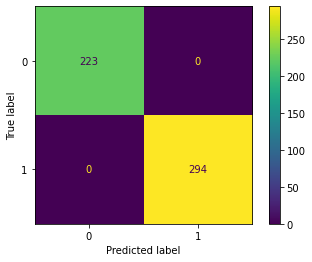

In [291]:
metrics.plot_confusion_matrix(clf, X_train, y_train)



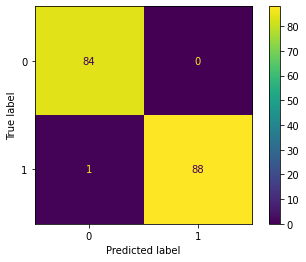

In [292]:
metrics.plot_confusion_matrix(clf,X_valid,y_valid)

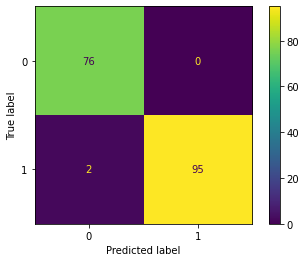

In [293]:
metrics.plot_confusion_matrix(clf,X_test,y_test)


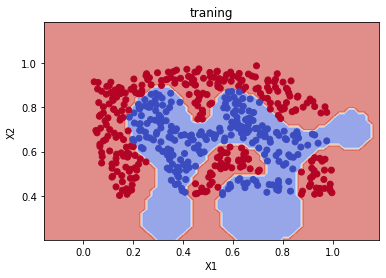

In [294]:
h =0.02
x_min,x_max=X_train[:, 0].min()-0.2,X_train[:, 0].max()+0.2
y_min,y_max=X_train[:, 1].min()-0.2, X_train[:, 1].max()+0.2
xs,ys=np.meshgrid(np.arange(x_min,x_max, h),np.arange(y_min,y_max,h))
plt.subplots_adjust(wspace=0.2,hspace=0.2)
Z = clf.predict(np.c_[xs.ravel(),ys.ravel()])
Z = Z.reshape(xs.shape)
plt.contourf(xs,ys,Z,cmap=plt.cm.coolwarm,alpha=0.6)
plt.scatter(X_train[:, 0],X_train[:, 1], c=y_train,cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('traning')
plt.show()

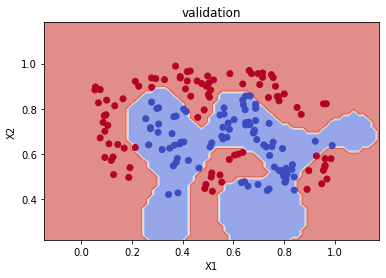

In [295]:
h=0.02
x_min,x_max=X_valid[:, 0].min()-0.2,X_valid[:, 0].max()+0.2
y_min,y_max= X_valid[:, 1].min()-0.2, X_valid[:, 1].max()+0.2
xs,ys=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
plt.subplots_adjust(wspace=0.2,hspace=0.2)
Z = clf.predict(np.c_[xs.ravel(),ys.ravel()])
Z = Z.reshape(xs.shape)
plt.contourf(xs,ys,Z,cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(X_valid[:, 0],X_valid[:, 1], c=y_valid, cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('validation')
plt.show()

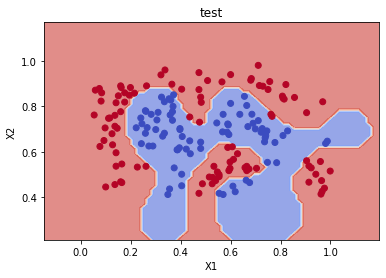

In [298]:
h=0.02
x_min,x_max=X_test[:, 0].min()-0.2,X_test[:, 0].max()+0.2
y_min,y_max=X_test[:, 1].min()-0.2,X_test[:, 1].max()+0.2
xs,ys=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
plt.subplots_adjust(wspace=0.2,hspace=0.2)
Z = clf.predict(np.c_[xs.ravel(),ys.ravel()])
Z = Z.reshape(xs.shape)
plt.contourf(xs,ys,Z,cmap=plt.cm.coolwarm,alpha=0.6)
plt.scatter(X_test[:, 0],X_test[:, 1],c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('test')
plt.show()

In [299]:
print('trainig')
y_pre=clf.predict(X_train)
acc =metrics.accuracy_score(y_train,y_pre)
print("Accu=",acc)
f1 =metrics.f1_score(y_train,y_pre)
print("F1 score=",f1)
precision =metrics.precision_score(y_train,y_pre)
print("Preci=",precision)
recall=metrics.recall_score(y_train,y_pre)
print("recall=",recall)
print('--------------------------------------------------')
print('testing')
Y_predicit_test=clf.predict(X_test)
acc =metrics.accuracy_score(y_test,Y_predicit_test)
print("Accu = ",acc)
f1 =metrics.f1_score(y_test,Y_predicit_test)
print("F1 score=",f1)
precision =metrics.precision_score(y_test,Y_predicit_test)
print("Preci=",precision)
recall=metrics.recall_score(y_test,Y_predicit_test)
print("recall=",recall)
print('--------------------------------------------------')
print('validation')
Y_valid=clf.predict(X_valid)
acc =metrics.accuracy_score(y_valid,Y_valid)
print("Accu=",acc)
f1 =metrics.f1_score(y_valid,Y_valid)
print("F1 score=",f1)
precision =metrics.precision_score(y_valid,Y_valid)
print("Preci=",precision)
recall=metrics.recall_score(y_valid,Y_valid)
print("recall=",recall)

trainig
Accu= 1.0
F1 score= 1.0
Preci= 1.0
recall= 1.0
--------------------------------------------------
testing
Accu =  0.9884393063583815
F1 score= 0.9895833333333333
Preci= 1.0
recall= 0.979381443298969
--------------------------------------------------
validation
Accu= 0.9942196531791907
F1 score= 0.9943502824858756
Preci= 1.0
recall= 0.9887640449438202
